In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_500_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_500_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_500_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_500_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

,Unnamed: 0,time,portfolio,stock,order
0,1,993,yshfc,1,-1.0
1,2,993,yshfc,2,-2.0
2,10,993,yshfc,10,1.0
3,11,993,yshfc,11,1.0
4,13,993,yshfc,13,-1.0
...,...,...,...,...,...
3836251,7,8192,xbcot,35,1.0
3836252,9,8192,xbcot,42,1.0
3836253,2,8192,jmeyl,76,1.0
3836254,3,8192,jmeyl,43,-1.0


In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [11]:
len(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192])

2217038

In [ ]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades22_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2217038
Cascade length:  30769
New Orders left:  2186269
making new cascade


OG Orders left:  2186269
Cascade length:  18190
New Orders left:  2168079
making new cascade


OG Orders left:  2168079
Cascade length:  20342
New Orders left:  2147737
making new cascade


OG Orders left:  2147737
Cascade length:  14429
New Orders left:  2133308
making new cascade


OG Orders left:  2133308
Cascade length:  16219
New Orders left:  2117089
making new cascade


OG Orders left:  2117089
Cascade length:  3099
New Orders left:  2113990
making new cascade


OG Orders left:  2113990
Cascade length:  7267
New Orders left:  2106723
making new cascade


OG Orders left:  2106723
Cascade length:  5967
New Orders left:  2100756
making new cascade


OG Orders left:  2100756
Cascade length:  14627
New Orders left:  2086129
making new cascade


OG Orders left:  2086129
Cascade length:  7161
New Orders left:  2078968
making new cascade


OG Orders left:  2078968
Cascade length:  5688
New Ord

Cascade length:  4319
New Orders left:  1740897
making new cascade


OG Orders left:  1740897
Cascade length:  5199
New Orders left:  1735698
making new cascade


OG Orders left:  1735698
Cascade length:  4463
New Orders left:  1731235
making new cascade


OG Orders left:  1731235
Cascade length:  3603
New Orders left:  1727632
making new cascade


OG Orders left:  1727632
Cascade length:  2838
New Orders left:  1724794
making new cascade


OG Orders left:  1724794
Cascade length:  6155
New Orders left:  1718639
making new cascade


OG Orders left:  1718639
Cascade length:  3265
New Orders left:  1715374
making new cascade


OG Orders left:  1715374
Cascade length:  9646
New Orders left:  1705728
making new cascade


OG Orders left:  1705728
Cascade length:  2189
New Orders left:  1703539
making new cascade


OG Orders left:  1703539
Cascade length:  7786
New Orders left:  1695753
making new cascade


OG Orders left:  1695753
Cascade length:  12881
New Orders left:  1682872
making new 

Cascade length:  2627
New Orders left:  1398420
making new cascade


OG Orders left:  1398420
Cascade length:  2692
New Orders left:  1395728
making new cascade


OG Orders left:  1395728
Cascade length:  3795
New Orders left:  1391933
making new cascade


OG Orders left:  1391933
Cascade length:  3107
New Orders left:  1388826
making new cascade


OG Orders left:  1388826
Cascade length:  3030
New Orders left:  1385796
making new cascade


OG Orders left:  1385796
Cascade length:  4403
New Orders left:  1381393
making new cascade


OG Orders left:  1381393
Cascade length:  4246
New Orders left:  1377147
making new cascade


OG Orders left:  1377147
Cascade length:  3053
New Orders left:  1374094
making new cascade


OG Orders left:  1374094
Cascade length:  6367
New Orders left:  1367727
making new cascade


OG Orders left:  1367727
Cascade length:  6120
New Orders left:  1361607
making new cascade


OG Orders left:  1361607
Cascade length:  3347
New Orders left:  1358260
making new c

Cascade length:  2116
New Orders left:  1097428
making new cascade


OG Orders left:  1097428
Cascade length:  2885
New Orders left:  1094543
making new cascade


OG Orders left:  1094543
Cascade length:  2155
New Orders left:  1092388
making new cascade


OG Orders left:  1092388
Cascade length:  1955
New Orders left:  1090433
making new cascade


OG Orders left:  1090433
Cascade length:  2565
New Orders left:  1087868
making new cascade


OG Orders left:  1087868
Cascade length:  2121
New Orders left:  1085747
making new cascade


OG Orders left:  1085747
Cascade length:  2966
New Orders left:  1082781
making new cascade


OG Orders left:  1082781
Cascade length:  2612
New Orders left:  1080169
making new cascade


OG Orders left:  1080169
Cascade length:  1345
New Orders left:  1078824
making new cascade


OG Orders left:  1078824
Cascade length:  5191
New Orders left:  1073633
making new cascade


OG Orders left:  1073633
Cascade length:  2722
New Orders left:  1070911
making new c

Cascade length:  2534
New Orders left:  800408
making new cascade


OG Orders left:  800408
Cascade length:  13550
New Orders left:  786858
making new cascade


OG Orders left:  786858
Cascade length:  5417
New Orders left:  781441
making new cascade


OG Orders left:  781441
Cascade length:  3133
New Orders left:  778308
making new cascade


OG Orders left:  778308
Cascade length:  4225
New Orders left:  774083
making new cascade


OG Orders left:  774083
Cascade length:  4304
New Orders left:  769779
making new cascade


OG Orders left:  769779
Cascade length:  7226
New Orders left:  762553
making new cascade


OG Orders left:  762553
Cascade length:  4116
New Orders left:  758437
making new cascade


OG Orders left:  758437
Cascade length:  2654
New Orders left:  755783
making new cascade


OG Orders left:  755783
Cascade length:  3236
New Orders left:  752547
making new cascade


OG Orders left:  752547
Cascade length:  2652
New Orders left:  749895
making new cascade


OG Orders l

Cascade length:  2729
New Orders left:  427173
making new cascade


OG Orders left:  427173
Cascade length:  2540
New Orders left:  424633
making new cascade


OG Orders left:  424633
Cascade length:  2684
New Orders left:  421949
making new cascade


OG Orders left:  421949
Cascade length:  8278
New Orders left:  413671
making new cascade


OG Orders left:  413671
Cascade length:  3395
New Orders left:  410276
making new cascade


OG Orders left:  410276
Cascade length:  5788
New Orders left:  404488
making new cascade


OG Orders left:  404488
Cascade length:  2545
New Orders left:  401943
making new cascade


OG Orders left:  401943
Cascade length:  3237
New Orders left:  398706
making new cascade


OG Orders left:  398706
Cascade length:  118
New Orders left:  398588
making new cascade


OG Orders left:  398588
Cascade length:  2077
New Orders left:  396511
making new cascade


OG Orders left:  396511
Cascade length:  3151
New Orders left:  393360
making new cascade


OG Orders lef

Cascade length:  2023
New Orders left:  158874
making new cascade


OG Orders left:  158874
Cascade length:  3863
New Orders left:  155011
making new cascade


OG Orders left:  155011
Cascade length:  2692
New Orders left:  152319
making new cascade


OG Orders left:  152319
Cascade length:  2680
New Orders left:  149639
making new cascade


OG Orders left:  149639
Cascade length:  2325
New Orders left:  147314
making new cascade


OG Orders left:  147314
Cascade length:  2846
New Orders left:  144468
making new cascade


OG Orders left:  144468
Cascade length:  2319
New Orders left:  142149
making new cascade


OG Orders left:  142149
Cascade length:  2570
New Orders left:  139579
making new cascade


OG Orders left:  139579
Cascade length:  4058
New Orders left:  135521
making new cascade


OG Orders left:  135521
Cascade length:  4732
New Orders left:  130789
making new cascade


OG Orders left:  130789
Cascade length:  2459
New Orders left:  128330
making new cascade


OG Orders le

In [5]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5192], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5192)
with open('../causalCascades/7-9/causalCascades21_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  2856341
Cascade length:  3525
New Orders left:  2852816
making new cascade


OG Orders left:  2852816
Cascade length:  3634
New Orders left:  2849182
making new cascade


OG Orders left:  2849182
Cascade length:  3392
New Orders left:  2845790
making new cascade


OG Orders left:  2845790
Cascade length:  3473
New Orders left:  2842317
making new cascade


OG Orders left:  2842317
Cascade length:  3688
New Orders left:  2838629
making new cascade


OG Orders left:  2838629
Cascade length:  3448
New Orders left:  2835181
making new cascade


OG Orders left:  2835181
Cascade length:  3818
New Orders left:  2831363
making new cascade


OG Orders left:  2831363
Cascade length:  3838
New Orders left:  2827525
making new cascade


OG Orders left:  2827525
Cascade length:  3503
New Orders left:  2824022
making new cascade


OG Orders left:  2824022
Cascade length:  1
New Orders left:  2824021
making new cascade


OG Orders left:  2824021
Cascade length:  14
New Orders left:  

Cascade length:  3547
New Orders left:  2641954
making new cascade


OG Orders left:  2641954
Cascade length:  3376
New Orders left:  2638578
making new cascade


OG Orders left:  2638578
Cascade length:  3289
New Orders left:  2635289
making new cascade


OG Orders left:  2635289
Cascade length:  22
New Orders left:  2635267
making new cascade


OG Orders left:  2635267
Cascade length:  2278
New Orders left:  2632989
making new cascade


OG Orders left:  2632989
Cascade length:  2992
New Orders left:  2629997
making new cascade


OG Orders left:  2629997
Cascade length:  3131
New Orders left:  2626866
making new cascade


OG Orders left:  2626866
Cascade length:  3296
New Orders left:  2623570
making new cascade


OG Orders left:  2623570
Cascade length:  1
New Orders left:  2623569
making new cascade


OG Orders left:  2623569
Cascade length:  3235
New Orders left:  2620334
making new cascade


OG Orders left:  2620334
Cascade length:  2891
New Orders left:  2617443
making new cascad

Cascade length:  1121
New Orders left:  2484178
making new cascade


OG Orders left:  2484178
Cascade length:  2030
New Orders left:  2482148
making new cascade


OG Orders left:  2482148
Cascade length:  21
New Orders left:  2482127
making new cascade


OG Orders left:  2482127
Cascade length:  4
New Orders left:  2482123
making new cascade


OG Orders left:  2482123
Cascade length:  1739
New Orders left:  2480384
making new cascade


OG Orders left:  2480384
Cascade length:  1
New Orders left:  2480383
making new cascade


OG Orders left:  2480383
Cascade length:  1906
New Orders left:  2478477
making new cascade


OG Orders left:  2478477
Cascade length:  14
New Orders left:  2478463
making new cascade


OG Orders left:  2478463
Cascade length:  19
New Orders left:  2478444
making new cascade


OG Orders left:  2478444
Cascade length:  1899
New Orders left:  2476545
making new cascade


OG Orders left:  2476545
Cascade length:  2063
New Orders left:  2474482
making new cascade


OG 

Cascade length:  1585
New Orders left:  2417734
making new cascade


OG Orders left:  2417734
Cascade length:  2
New Orders left:  2417732
making new cascade


OG Orders left:  2417732
Cascade length:  1607
New Orders left:  2416125
making new cascade


OG Orders left:  2416125
Cascade length:  21
New Orders left:  2416104
making new cascade


OG Orders left:  2416104
Cascade length:  1657
New Orders left:  2414447
making new cascade


OG Orders left:  2414447
Cascade length:  3
New Orders left:  2414444
making new cascade


OG Orders left:  2414444
Cascade length:  1570
New Orders left:  2412874
making new cascade


OG Orders left:  2412874
Cascade length:  12
New Orders left:  2412862
making new cascade


OG Orders left:  2412862
Cascade length:  1574
New Orders left:  2411288
making new cascade


OG Orders left:  2411288
Cascade length:  9
New Orders left:  2411279
making new cascade


OG Orders left:  2411279
Cascade length:  1
New Orders left:  2411278
making new cascade


OG Orde

Cascade length:  1062
New Orders left:  2347576
making new cascade


OG Orders left:  2347576
Cascade length:  10
New Orders left:  2347566
making new cascade


OG Orders left:  2347566
Cascade length:  45
New Orders left:  2347521
making new cascade


OG Orders left:  2347521
Cascade length:  1690
New Orders left:  2345831
making new cascade


OG Orders left:  2345831
Cascade length:  2002
New Orders left:  2343829
making new cascade


OG Orders left:  2343829
Cascade length:  21
New Orders left:  2343808
making new cascade


OG Orders left:  2343808
Cascade length:  5
New Orders left:  2343803
making new cascade


OG Orders left:  2343803
Cascade length:  1710
New Orders left:  2342093
making new cascade


OG Orders left:  2342093
Cascade length:  989
New Orders left:  2341104
making new cascade


OG Orders left:  2341104
Cascade length:  7
New Orders left:  2341097
making new cascade


OG Orders left:  2341097
Cascade length:  15
New Orders left:  2341082
making new cascade


OG Ord

Cascade length:  2
New Orders left:  2296197
making new cascade


OG Orders left:  2296197
Cascade length:  37
New Orders left:  2296160
making new cascade


OG Orders left:  2296160
Cascade length:  6
New Orders left:  2296154
making new cascade


OG Orders left:  2296154
Cascade length:  14
New Orders left:  2296140
making new cascade


OG Orders left:  2296140
Cascade length:  1724
New Orders left:  2294416
making new cascade


OG Orders left:  2294416
Cascade length:  17
New Orders left:  2294399
making new cascade


OG Orders left:  2294399
Cascade length:  32
New Orders left:  2294367
making new cascade


OG Orders left:  2294367
Cascade length:  6
New Orders left:  2294361
making new cascade


OG Orders left:  2294361
Cascade length:  1416
New Orders left:  2292945
making new cascade


OG Orders left:  2292945
Cascade length:  1791
New Orders left:  2291154
making new cascade


OG Orders left:  2291154
Cascade length:  2041
New Orders left:  2289113
making new cascade


OG Order

Cascade length:  1776
New Orders left:  2248400
making new cascade


OG Orders left:  2248400
Cascade length:  28
New Orders left:  2248372
making new cascade


OG Orders left:  2248372
Cascade length:  1459
New Orders left:  2246913
making new cascade


OG Orders left:  2246913
Cascade length:  3
New Orders left:  2246910
making new cascade


OG Orders left:  2246910
Cascade length:  1
New Orders left:  2246909
making new cascade


OG Orders left:  2246909
Cascade length:  608
New Orders left:  2246301
making new cascade


OG Orders left:  2246301
Cascade length:  6
New Orders left:  2246295
making new cascade


OG Orders left:  2246295
Cascade length:  1524
New Orders left:  2244771
making new cascade


OG Orders left:  2244771
Cascade length:  9
New Orders left:  2244762
making new cascade


OG Orders left:  2244762
Cascade length:  40
New Orders left:  2244722
making new cascade


OG Orders left:  2244722
Cascade length:  8
New Orders left:  2244714
making new cascade


OG Orders l

Cascade length:  1
New Orders left:  2189782
making new cascade


OG Orders left:  2189782
Cascade length:  111
New Orders left:  2189671
making new cascade


OG Orders left:  2189671
Cascade length:  1947
New Orders left:  2187724
making new cascade


OG Orders left:  2187724
Cascade length:  3
New Orders left:  2187721
making new cascade


OG Orders left:  2187721
Cascade length:  74
New Orders left:  2187647
making new cascade


OG Orders left:  2187647
Cascade length:  1560
New Orders left:  2186087
making new cascade


OG Orders left:  2186087
Cascade length:  7
New Orders left:  2186080
making new cascade


OG Orders left:  2186080
Cascade length:  14
New Orders left:  2186066
making new cascade


OG Orders left:  2186066
Cascade length:  1265
New Orders left:  2184801
making new cascade


OG Orders left:  2184801
Cascade length:  817
New Orders left:  2183984
making new cascade


OG Orders left:  2183984
Cascade length:  528
New Orders left:  2183456
making new cascade


OG Orde

Cascade length:  1934
New Orders left:  2132226
making new cascade


OG Orders left:  2132226
Cascade length:  48
New Orders left:  2132178
making new cascade


OG Orders left:  2132178
Cascade length:  18
New Orders left:  2132160
making new cascade


OG Orders left:  2132160
Cascade length:  58
New Orders left:  2132102
making new cascade


OG Orders left:  2132102
Cascade length:  1712
New Orders left:  2130390
making new cascade


OG Orders left:  2130390
Cascade length:  3
New Orders left:  2130387
making new cascade


OG Orders left:  2130387
Cascade length:  4
New Orders left:  2130383
making new cascade


OG Orders left:  2130383
Cascade length:  1
New Orders left:  2130382
making new cascade


OG Orders left:  2130382
Cascade length:  62
New Orders left:  2130320
making new cascade


OG Orders left:  2130320
Cascade length:  1907
New Orders left:  2128413
making new cascade


OG Orders left:  2128413
Cascade length:  3
New Orders left:  2128410
making new cascade


OG Orders l

Cascade length:  26
New Orders left:  2065853
making new cascade


OG Orders left:  2065853
Cascade length:  2
New Orders left:  2065851
making new cascade


OG Orders left:  2065851
Cascade length:  18
New Orders left:  2065833
making new cascade


OG Orders left:  2065833
Cascade length:  2126
New Orders left:  2063707
making new cascade


OG Orders left:  2063707
Cascade length:  3
New Orders left:  2063704
making new cascade


OG Orders left:  2063704
Cascade length:  1859
New Orders left:  2061845
making new cascade


OG Orders left:  2061845
Cascade length:  36
New Orders left:  2061809
making new cascade


OG Orders left:  2061809
Cascade length:  1353
New Orders left:  2060456
making new cascade


OG Orders left:  2060456
Cascade length:  101
New Orders left:  2060355
making new cascade


OG Orders left:  2060355
Cascade length:  163
New Orders left:  2060192
making new cascade


OG Orders left:  2060192
Cascade length:  2068
New Orders left:  2058124
making new cascade


OG Or

Cascade length:  2340
New Orders left:  1995762
making new cascade


OG Orders left:  1995762
Cascade length:  2475
New Orders left:  1993287
making new cascade


OG Orders left:  1993287
Cascade length:  10
New Orders left:  1993277
making new cascade


OG Orders left:  1993277
Cascade length:  4
New Orders left:  1993273
making new cascade


OG Orders left:  1993273
Cascade length:  2093
New Orders left:  1991180
making new cascade


OG Orders left:  1991180
Cascade length:  25
New Orders left:  1991155
making new cascade


OG Orders left:  1991155
Cascade length:  26
New Orders left:  1991129
making new cascade


OG Orders left:  1991129
Cascade length:  4
New Orders left:  1991125
making new cascade


OG Orders left:  1991125
Cascade length:  2276
New Orders left:  1988849
making new cascade


OG Orders left:  1988849
Cascade length:  2340
New Orders left:  1986509
making new cascade


OG Orders left:  1986509
Cascade length:  4
New Orders left:  1986505
making new cascade


OG Ord

Cascade length:  5
New Orders left:  1926569
making new cascade


OG Orders left:  1926569
Cascade length:  16
New Orders left:  1926553
making new cascade


OG Orders left:  1926553
Cascade length:  2
New Orders left:  1926551
making new cascade


OG Orders left:  1926551
Cascade length:  1778
New Orders left:  1924773
making new cascade


OG Orders left:  1924773
Cascade length:  2248
New Orders left:  1922525
making new cascade


OG Orders left:  1922525
Cascade length:  13
New Orders left:  1922512
making new cascade


OG Orders left:  1922512
Cascade length:  2013
New Orders left:  1920499
making new cascade


OG Orders left:  1920499
Cascade length:  14
New Orders left:  1920485
making new cascade


OG Orders left:  1920485
Cascade length:  15
New Orders left:  1920470
making new cascade


OG Orders left:  1920470
Cascade length:  1394
New Orders left:  1919076
making new cascade


OG Orders left:  1919076
Cascade length:  2
New Orders left:  1919074
making new cascade


OG Order

Cascade length:  4
New Orders left:  1859097
making new cascade


OG Orders left:  1859097
Cascade length:  87
New Orders left:  1859010
making new cascade


OG Orders left:  1859010
Cascade length:  2146
New Orders left:  1856864
making new cascade


OG Orders left:  1856864
Cascade length:  1
New Orders left:  1856863
making new cascade


OG Orders left:  1856863
Cascade length:  59
New Orders left:  1856804
making new cascade


OG Orders left:  1856804
Cascade length:  125
New Orders left:  1856679
making new cascade


OG Orders left:  1856679
Cascade length:  2346
New Orders left:  1854333
making new cascade


OG Orders left:  1854333
Cascade length:  2
New Orders left:  1854331
making new cascade


OG Orders left:  1854331
Cascade length:  88
New Orders left:  1854243
making new cascade


OG Orders left:  1854243
Cascade length:  6
New Orders left:  1854237
making new cascade


OG Orders left:  1854237
Cascade length:  135
New Orders left:  1854102
making new cascade


OG Orders l

Cascade length:  2283
New Orders left:  1785302
making new cascade


OG Orders left:  1785302
Cascade length:  204
New Orders left:  1785098
making new cascade


OG Orders left:  1785098
Cascade length:  2009
New Orders left:  1783089
making new cascade


OG Orders left:  1783089
Cascade length:  2541
New Orders left:  1780548
making new cascade


OG Orders left:  1780548
Cascade length:  6
New Orders left:  1780542
making new cascade


OG Orders left:  1780542
Cascade length:  1249
New Orders left:  1779293
making new cascade


OG Orders left:  1779293
Cascade length:  4
New Orders left:  1779289
making new cascade


OG Orders left:  1779289
Cascade length:  1
New Orders left:  1779288
making new cascade


OG Orders left:  1779288
Cascade length:  1963
New Orders left:  1777325
making new cascade


OG Orders left:  1777325
Cascade length:  18
New Orders left:  1777307
making new cascade


OG Orders left:  1777307
Cascade length:  339
New Orders left:  1776968
making new cascade


OG O

Cascade length:  2483
New Orders left:  1710156
making new cascade


OG Orders left:  1710156
Cascade length:  92
New Orders left:  1710064
making new cascade


OG Orders left:  1710064
Cascade length:  2348
New Orders left:  1707716
making new cascade


OG Orders left:  1707716
Cascade length:  2122
New Orders left:  1705594
making new cascade


OG Orders left:  1705594
Cascade length:  1
New Orders left:  1705593
making new cascade


OG Orders left:  1705593
Cascade length:  17
New Orders left:  1705576
making new cascade


OG Orders left:  1705576
Cascade length:  2443
New Orders left:  1703133
making new cascade


OG Orders left:  1703133
Cascade length:  5
New Orders left:  1703128
making new cascade


OG Orders left:  1703128
Cascade length:  1916
New Orders left:  1701212
making new cascade


OG Orders left:  1701212
Cascade length:  907
New Orders left:  1700305
making new cascade


OG Orders left:  1700305
Cascade length:  1
New Orders left:  1700304
making new cascade


OG Or

Cascade length:  1
New Orders left:  1640239
making new cascade


OG Orders left:  1640239
Cascade length:  5
New Orders left:  1640234
making new cascade


OG Orders left:  1640234
Cascade length:  21
New Orders left:  1640213
making new cascade


OG Orders left:  1640213
Cascade length:  17
New Orders left:  1640196
making new cascade


OG Orders left:  1640196
Cascade length:  1913
New Orders left:  1638283
making new cascade


OG Orders left:  1638283
Cascade length:  18
New Orders left:  1638265
making new cascade


OG Orders left:  1638265
Cascade length:  8
New Orders left:  1638257
making new cascade


OG Orders left:  1638257
Cascade length:  10
New Orders left:  1638247
making new cascade


OG Orders left:  1638247
Cascade length:  2382
New Orders left:  1635865
making new cascade


OG Orders left:  1635865
Cascade length:  2354
New Orders left:  1633511
making new cascade


OG Orders left:  1633511
Cascade length:  14
New Orders left:  1633497
making new cascade


OG Orders 

Cascade length:  2039
New Orders left:  1568190
making new cascade


OG Orders left:  1568190
Cascade length:  20
New Orders left:  1568170
making new cascade


OG Orders left:  1568170
Cascade length:  1
New Orders left:  1568169
making new cascade


OG Orders left:  1568169
Cascade length:  1
New Orders left:  1568168
making new cascade


OG Orders left:  1568168
Cascade length:  44
New Orders left:  1568124
making new cascade


OG Orders left:  1568124
Cascade length:  9
New Orders left:  1568115
making new cascade


OG Orders left:  1568115
Cascade length:  18
New Orders left:  1568097
making new cascade


OG Orders left:  1568097
Cascade length:  2349
New Orders left:  1565748
making new cascade


OG Orders left:  1565748
Cascade length:  90
New Orders left:  1565658
making new cascade


OG Orders left:  1565658
Cascade length:  1804
New Orders left:  1563854
making new cascade


OG Orders left:  1563854
Cascade length:  5
New Orders left:  1563849
making new cascade


OG Orders l

Cascade length:  26
New Orders left:  1503055
making new cascade


OG Orders left:  1503055
Cascade length:  5
New Orders left:  1503050
making new cascade


OG Orders left:  1503050
Cascade length:  37
New Orders left:  1503013
making new cascade


OG Orders left:  1503013
Cascade length:  24
New Orders left:  1502989
making new cascade


OG Orders left:  1502989
Cascade length:  1274
New Orders left:  1501715
making new cascade


OG Orders left:  1501715
Cascade length:  10
New Orders left:  1501705
making new cascade


OG Orders left:  1501705
Cascade length:  1929
New Orders left:  1499776
making new cascade


OG Orders left:  1499776
Cascade length:  1381
New Orders left:  1498395
making new cascade


OG Orders left:  1498395
Cascade length:  30
New Orders left:  1498365
making new cascade


OG Orders left:  1498365
Cascade length:  1961
New Orders left:  1496404
making new cascade


OG Orders left:  1496404
Cascade length:  2010
New Orders left:  1494394
making new cascade


OG O

Cascade length:  24
New Orders left:  1433837
making new cascade


OG Orders left:  1433837
Cascade length:  1
New Orders left:  1433836
making new cascade


OG Orders left:  1433836
Cascade length:  9
New Orders left:  1433827
making new cascade


OG Orders left:  1433827
Cascade length:  564
New Orders left:  1433263
making new cascade


OG Orders left:  1433263
Cascade length:  2275
New Orders left:  1430988
making new cascade


OG Orders left:  1430988
Cascade length:  7
New Orders left:  1430981
making new cascade


OG Orders left:  1430981
Cascade length:  52
New Orders left:  1430929
making new cascade


OG Orders left:  1430929
Cascade length:  1611
New Orders left:  1429318
making new cascade


OG Orders left:  1429318
Cascade length:  1669
New Orders left:  1427649
making new cascade


OG Orders left:  1427649
Cascade length:  1
New Orders left:  1427648
making new cascade


OG Orders left:  1427648
Cascade length:  1884
New Orders left:  1425764
making new cascade


OG Order

Cascade length:  355
New Orders left:  1365768
making new cascade


OG Orders left:  1365768
Cascade length:  12
New Orders left:  1365756
making new cascade


OG Orders left:  1365756
Cascade length:  1
New Orders left:  1365755
making new cascade


OG Orders left:  1365755
Cascade length:  1416
New Orders left:  1364339
making new cascade


OG Orders left:  1364339
Cascade length:  8
New Orders left:  1364331
making new cascade


OG Orders left:  1364331
Cascade length:  38
New Orders left:  1364293
making new cascade


OG Orders left:  1364293
Cascade length:  10
New Orders left:  1364283
making new cascade


OG Orders left:  1364283
Cascade length:  1525
New Orders left:  1362758
making new cascade


OG Orders left:  1362758
Cascade length:  1577
New Orders left:  1361181
making new cascade


OG Orders left:  1361181
Cascade length:  766
New Orders left:  1360415
making new cascade


OG Orders left:  1360415
Cascade length:  1844
New Orders left:  1358571
making new cascade


OG Or

Cascade length:  79
New Orders left:  1308700
making new cascade


OG Orders left:  1308700
Cascade length:  1859
New Orders left:  1306841
making new cascade


OG Orders left:  1306841
Cascade length:  1494
New Orders left:  1305347
making new cascade


OG Orders left:  1305347
Cascade length:  17
New Orders left:  1305330
making new cascade


OG Orders left:  1305330
Cascade length:  8
New Orders left:  1305322
making new cascade


OG Orders left:  1305322
Cascade length:  18
New Orders left:  1305304
making new cascade


OG Orders left:  1305304
Cascade length:  84
New Orders left:  1305220
making new cascade


OG Orders left:  1305220
Cascade length:  1608
New Orders left:  1303612
making new cascade


OG Orders left:  1303612
Cascade length:  86
New Orders left:  1303526
making new cascade


OG Orders left:  1303526
Cascade length:  1
New Orders left:  1303525
making new cascade


OG Orders left:  1303525
Cascade length:  2
New Orders left:  1303523
making new cascade


OG Orders 

Cascade length:  6
New Orders left:  1261596
making new cascade


OG Orders left:  1261596
Cascade length:  38
New Orders left:  1261558
making new cascade


OG Orders left:  1261558
Cascade length:  20
New Orders left:  1261538
making new cascade


OG Orders left:  1261538
Cascade length:  103
New Orders left:  1261435
making new cascade


OG Orders left:  1261435
Cascade length:  4
New Orders left:  1261431
making new cascade


OG Orders left:  1261431
Cascade length:  2
New Orders left:  1261429
making new cascade


OG Orders left:  1261429
Cascade length:  1595
New Orders left:  1259834
making new cascade


OG Orders left:  1259834
Cascade length:  4
New Orders left:  1259830
making new cascade


OG Orders left:  1259830
Cascade length:  2020
New Orders left:  1257810
making new cascade


OG Orders left:  1257810
Cascade length:  35
New Orders left:  1257775
making new cascade


OG Orders left:  1257775
Cascade length:  1811
New Orders left:  1255964
making new cascade


OG Orders 

Cascade length:  1535
New Orders left:  1196035
making new cascade


OG Orders left:  1196035
Cascade length:  1869
New Orders left:  1194166
making new cascade


OG Orders left:  1194166
Cascade length:  2
New Orders left:  1194164
making new cascade


OG Orders left:  1194164
Cascade length:  13
New Orders left:  1194151
making new cascade


OG Orders left:  1194151
Cascade length:  1263
New Orders left:  1192888
making new cascade


OG Orders left:  1192888
Cascade length:  26
New Orders left:  1192862
making new cascade


OG Orders left:  1192862
Cascade length:  2205
New Orders left:  1190657
making new cascade


OG Orders left:  1190657
Cascade length:  1497
New Orders left:  1189160
making new cascade


OG Orders left:  1189160
Cascade length:  9
New Orders left:  1189151
making new cascade


OG Orders left:  1189151
Cascade length:  4
New Orders left:  1189147
making new cascade


OG Orders left:  1189147
Cascade length:  1
New Orders left:  1189146
making new cascade


OG Orde

Cascade length:  158
New Orders left:  1149767
making new cascade


OG Orders left:  1149767
Cascade length:  32
New Orders left:  1149735
making new cascade


OG Orders left:  1149735
Cascade length:  11
New Orders left:  1149724
making new cascade


OG Orders left:  1149724
Cascade length:  2
New Orders left:  1149722
making new cascade


OG Orders left:  1149722
Cascade length:  1550
New Orders left:  1148172
making new cascade


OG Orders left:  1148172
Cascade length:  9
New Orders left:  1148163
making new cascade


OG Orders left:  1148163
Cascade length:  10
New Orders left:  1148153
making new cascade


OG Orders left:  1148153
Cascade length:  76
New Orders left:  1148077
making new cascade


OG Orders left:  1148077
Cascade length:  7
New Orders left:  1148070
making new cascade


OG Orders left:  1148070
Cascade length:  6
New Orders left:  1148064
making new cascade


OG Orders left:  1148064
Cascade length:  40
New Orders left:  1148024
making new cascade


OG Orders left

Cascade length:  2335
New Orders left:  1104940
making new cascade


OG Orders left:  1104940
Cascade length:  1
New Orders left:  1104939
making new cascade


OG Orders left:  1104939
Cascade length:  1239
New Orders left:  1103700
making new cascade


OG Orders left:  1103700
Cascade length:  1
New Orders left:  1103699
making new cascade


OG Orders left:  1103699
Cascade length:  1812
New Orders left:  1101887
making new cascade


OG Orders left:  1101887
Cascade length:  110
New Orders left:  1101777
making new cascade


OG Orders left:  1101777
Cascade length:  1953
New Orders left:  1099824
making new cascade


OG Orders left:  1099824
Cascade length:  1491
New Orders left:  1098333
making new cascade


OG Orders left:  1098333
Cascade length:  30
New Orders left:  1098303
making new cascade


OG Orders left:  1098303
Cascade length:  2142
New Orders left:  1096161
making new cascade


OG Orders left:  1096161
Cascade length:  97
New Orders left:  1096064
making new cascade


OG

Cascade length:  742
New Orders left:  1049449
making new cascade


OG Orders left:  1049449
Cascade length:  2
New Orders left:  1049447
making new cascade


OG Orders left:  1049447
Cascade length:  1007
New Orders left:  1048440
making new cascade


OG Orders left:  1048440
Cascade length:  2
New Orders left:  1048438
making new cascade


OG Orders left:  1048438
Cascade length:  19
New Orders left:  1048419
making new cascade


OG Orders left:  1048419
Cascade length:  5
New Orders left:  1048414
making new cascade


OG Orders left:  1048414
Cascade length:  59
New Orders left:  1048355
making new cascade


OG Orders left:  1048355
Cascade length:  10
New Orders left:  1048345
making new cascade


OG Orders left:  1048345
Cascade length:  876
New Orders left:  1047469
making new cascade


OG Orders left:  1047469
Cascade length:  1404
New Orders left:  1046065
making new cascade


OG Orders left:  1046065
Cascade length:  1770
New Orders left:  1044295
making new cascade


OG Order

Cascade length:  1897
New Orders left:  981070
making new cascade


OG Orders left:  981070
Cascade length:  4
New Orders left:  981066
making new cascade


OG Orders left:  981066
Cascade length:  51
New Orders left:  981015
making new cascade


OG Orders left:  981015
Cascade length:  6
New Orders left:  981009
making new cascade


OG Orders left:  981009
Cascade length:  1134
New Orders left:  979875
making new cascade


OG Orders left:  979875
Cascade length:  6
New Orders left:  979869
making new cascade


OG Orders left:  979869
Cascade length:  1941
New Orders left:  977928
making new cascade


OG Orders left:  977928
Cascade length:  2172
New Orders left:  975756
making new cascade


OG Orders left:  975756
Cascade length:  4
New Orders left:  975752
making new cascade


OG Orders left:  975752
Cascade length:  6
New Orders left:  975746
making new cascade


OG Orders left:  975746
Cascade length:  6
New Orders left:  975740
making new cascade


OG Orders left:  975740
Cascade 

Cascade length:  5
New Orders left:  907865
making new cascade


OG Orders left:  907865
Cascade length:  1327
New Orders left:  906538
making new cascade


OG Orders left:  906538
Cascade length:  199
New Orders left:  906339
making new cascade


OG Orders left:  906339
Cascade length:  1
New Orders left:  906338
making new cascade


OG Orders left:  906338
Cascade length:  17
New Orders left:  906321
making new cascade


OG Orders left:  906321
Cascade length:  2
New Orders left:  906319
making new cascade


OG Orders left:  906319
Cascade length:  1204
New Orders left:  905115
making new cascade


OG Orders left:  905115
Cascade length:  8
New Orders left:  905107
making new cascade


OG Orders left:  905107
Cascade length:  49
New Orders left:  905058
making new cascade


OG Orders left:  905058
Cascade length:  45
New Orders left:  905013
making new cascade


OG Orders left:  905013
Cascade length:  2183
New Orders left:  902830
making new cascade


OG Orders left:  902830
Cascade

Cascade length:  2
New Orders left:  859531
making new cascade


OG Orders left:  859531
Cascade length:  4
New Orders left:  859527
making new cascade


OG Orders left:  859527
Cascade length:  1738
New Orders left:  857789
making new cascade


OG Orders left:  857789
Cascade length:  9
New Orders left:  857780
making new cascade


OG Orders left:  857780
Cascade length:  1
New Orders left:  857779
making new cascade


OG Orders left:  857779
Cascade length:  1616
New Orders left:  856163
making new cascade


OG Orders left:  856163
Cascade length:  23
New Orders left:  856140
making new cascade


OG Orders left:  856140
Cascade length:  1908
New Orders left:  854232
making new cascade


OG Orders left:  854232
Cascade length:  14
New Orders left:  854218
making new cascade


OG Orders left:  854218
Cascade length:  1
New Orders left:  854217
making new cascade


OG Orders left:  854217
Cascade length:  596
New Orders left:  853621
making new cascade


OG Orders left:  853621
Cascade 

Cascade length:  14
New Orders left:  820267
making new cascade


OG Orders left:  820267
Cascade length:  29
New Orders left:  820238
making new cascade


OG Orders left:  820238
Cascade length:  263
New Orders left:  819975
making new cascade


OG Orders left:  819975
Cascade length:  1197
New Orders left:  818778
making new cascade


OG Orders left:  818778
Cascade length:  1077
New Orders left:  817701
making new cascade


OG Orders left:  817701
Cascade length:  2244
New Orders left:  815457
making new cascade


OG Orders left:  815457
Cascade length:  68
New Orders left:  815389
making new cascade


OG Orders left:  815389
Cascade length:  6
New Orders left:  815383
making new cascade


OG Orders left:  815383
Cascade length:  54
New Orders left:  815329
making new cascade


OG Orders left:  815329
Cascade length:  1
New Orders left:  815328
making new cascade


OG Orders left:  815328
Cascade length:  57
New Orders left:  815271
making new cascade


OG Orders left:  815271
Casca

Cascade length:  519
New Orders left:  759810
making new cascade


OG Orders left:  759810
Cascade length:  5
New Orders left:  759805
making new cascade


OG Orders left:  759805
Cascade length:  2070
New Orders left:  757735
making new cascade


OG Orders left:  757735
Cascade length:  11
New Orders left:  757724
making new cascade


OG Orders left:  757724
Cascade length:  343
New Orders left:  757381
making new cascade


OG Orders left:  757381
Cascade length:  1
New Orders left:  757380
making new cascade


OG Orders left:  757380
Cascade length:  2393
New Orders left:  754987
making new cascade


OG Orders left:  754987
Cascade length:  38
New Orders left:  754949
making new cascade


OG Orders left:  754949
Cascade length:  80
New Orders left:  754869
making new cascade


OG Orders left:  754869
Cascade length:  1
New Orders left:  754868
making new cascade


OG Orders left:  754868
Cascade length:  1889
New Orders left:  752979
making new cascade


OG Orders left:  752979
Casca

Cascade length:  26
New Orders left:  690206
making new cascade


OG Orders left:  690206
Cascade length:  1
New Orders left:  690205
making new cascade


OG Orders left:  690205
Cascade length:  31
New Orders left:  690174
making new cascade


OG Orders left:  690174
Cascade length:  1936
New Orders left:  688238
making new cascade


OG Orders left:  688238
Cascade length:  8
New Orders left:  688230
making new cascade


OG Orders left:  688230
Cascade length:  1594
New Orders left:  686636
making new cascade


OG Orders left:  686636
Cascade length:  2090
New Orders left:  684546
making new cascade


OG Orders left:  684546
Cascade length:  1712
New Orders left:  682834
making new cascade


OG Orders left:  682834
Cascade length:  28
New Orders left:  682806
making new cascade


OG Orders left:  682806
Cascade length:  2006
New Orders left:  680800
making new cascade


OG Orders left:  680800
Cascade length:  4
New Orders left:  680796
making new cascade


OG Orders left:  680796
Cas

Cascade length:  1379
New Orders left:  623798
making new cascade


OG Orders left:  623798
Cascade length:  23
New Orders left:  623775
making new cascade


OG Orders left:  623775
Cascade length:  1802
New Orders left:  621973
making new cascade


OG Orders left:  621973
Cascade length:  936
New Orders left:  621037
making new cascade


OG Orders left:  621037
Cascade length:  1557
New Orders left:  619480
making new cascade


OG Orders left:  619480
Cascade length:  1611
New Orders left:  617869
making new cascade


OG Orders left:  617869
Cascade length:  35
New Orders left:  617834
making new cascade


OG Orders left:  617834
Cascade length:  17
New Orders left:  617817
making new cascade


OG Orders left:  617817
Cascade length:  73
New Orders left:  617744
making new cascade


OG Orders left:  617744
Cascade length:  1579
New Orders left:  616165
making new cascade


OG Orders left:  616165
Cascade length:  465
New Orders left:  615700
making new cascade


OG Orders left:  61570

Cascade length:  14
New Orders left:  556079
making new cascade


OG Orders left:  556079
Cascade length:  610
New Orders left:  555469
making new cascade


OG Orders left:  555469
Cascade length:  1605
New Orders left:  553864
making new cascade


OG Orders left:  553864
Cascade length:  1
New Orders left:  553863
making new cascade


OG Orders left:  553863
Cascade length:  1158
New Orders left:  552705
making new cascade


OG Orders left:  552705
Cascade length:  1827
New Orders left:  550878
making new cascade


OG Orders left:  550878
Cascade length:  2
New Orders left:  550876
making new cascade


OG Orders left:  550876
Cascade length:  1417
New Orders left:  549459
making new cascade


OG Orders left:  549459
Cascade length:  6
New Orders left:  549453
making new cascade


OG Orders left:  549453
Cascade length:  1
New Orders left:  549452
making new cascade


OG Orders left:  549452
Cascade length:  963
New Orders left:  548489
making new cascade


OG Orders left:  548489
Casc

Cascade length:  12
New Orders left:  499557
making new cascade


OG Orders left:  499557
Cascade length:  534
New Orders left:  499023
making new cascade


OG Orders left:  499023
Cascade length:  618
New Orders left:  498405
making new cascade


OG Orders left:  498405
Cascade length:  2
New Orders left:  498403
making new cascade


OG Orders left:  498403
Cascade length:  26
New Orders left:  498377
making new cascade


OG Orders left:  498377
Cascade length:  211
New Orders left:  498166
making new cascade


OG Orders left:  498166
Cascade length:  768
New Orders left:  497398
making new cascade


OG Orders left:  497398
Cascade length:  100
New Orders left:  497298
making new cascade


OG Orders left:  497298
Cascade length:  109
New Orders left:  497189
making new cascade


OG Orders left:  497189
Cascade length:  2055
New Orders left:  495134
making new cascade


OG Orders left:  495134
Cascade length:  6
New Orders left:  495128
making new cascade


OG Orders left:  495128
Casc

Cascade length:  962
New Orders left:  462064
making new cascade


OG Orders left:  462064
Cascade length:  968
New Orders left:  461096
making new cascade


OG Orders left:  461096
Cascade length:  11
New Orders left:  461085
making new cascade


OG Orders left:  461085
Cascade length:  79
New Orders left:  461006
making new cascade


OG Orders left:  461006
Cascade length:  17
New Orders left:  460989
making new cascade


OG Orders left:  460989
Cascade length:  2
New Orders left:  460987
making new cascade


OG Orders left:  460987
Cascade length:  1271
New Orders left:  459716
making new cascade


OG Orders left:  459716
Cascade length:  1032
New Orders left:  458684
making new cascade


OG Orders left:  458684
Cascade length:  103
New Orders left:  458581
making new cascade


OG Orders left:  458581
Cascade length:  1126
New Orders left:  457455
making new cascade


OG Orders left:  457455
Cascade length:  2
New Orders left:  457453
making new cascade


OG Orders left:  457453
Cas

Cascade length:  1659
New Orders left:  418352
making new cascade


OG Orders left:  418352
Cascade length:  46
New Orders left:  418306
making new cascade


OG Orders left:  418306
Cascade length:  1513
New Orders left:  416793
making new cascade


OG Orders left:  416793
Cascade length:  17
New Orders left:  416776
making new cascade


OG Orders left:  416776
Cascade length:  9
New Orders left:  416767
making new cascade


OG Orders left:  416767
Cascade length:  18
New Orders left:  416749
making new cascade


OG Orders left:  416749
Cascade length:  1604
New Orders left:  415145
making new cascade


OG Orders left:  415145
Cascade length:  24
New Orders left:  415121
making new cascade


OG Orders left:  415121
Cascade length:  29
New Orders left:  415092
making new cascade


OG Orders left:  415092
Cascade length:  4
New Orders left:  415088
making new cascade


OG Orders left:  415088
Cascade length:  1116
New Orders left:  413972
making new cascade


OG Orders left:  413972
Casc

Cascade length:  1162
New Orders left:  347171
making new cascade


OG Orders left:  347171
Cascade length:  1925
New Orders left:  345246
making new cascade


OG Orders left:  345246
Cascade length:  14
New Orders left:  345232
making new cascade


OG Orders left:  345232
Cascade length:  21
New Orders left:  345211
making new cascade


OG Orders left:  345211
Cascade length:  869
New Orders left:  344342
making new cascade


OG Orders left:  344342
Cascade length:  2
New Orders left:  344340
making new cascade


OG Orders left:  344340
Cascade length:  766
New Orders left:  343574
making new cascade


OG Orders left:  343574
Cascade length:  32
New Orders left:  343542
making new cascade


OG Orders left:  343542
Cascade length:  6
New Orders left:  343536
making new cascade


OG Orders left:  343536
Cascade length:  18
New Orders left:  343518
making new cascade


OG Orders left:  343518
Cascade length:  246
New Orders left:  343272
making new cascade


OG Orders left:  343272
Casca

Cascade length:  2238
New Orders left:  271102
making new cascade


OG Orders left:  271102
Cascade length:  11
New Orders left:  271091
making new cascade


OG Orders left:  271091
Cascade length:  17
New Orders left:  271074
making new cascade


OG Orders left:  271074
Cascade length:  5
New Orders left:  271069
making new cascade


OG Orders left:  271069
Cascade length:  1378
New Orders left:  269691
making new cascade


OG Orders left:  269691
Cascade length:  932
New Orders left:  268759
making new cascade


OG Orders left:  268759
Cascade length:  101
New Orders left:  268658
making new cascade


OG Orders left:  268658
Cascade length:  16
New Orders left:  268642
making new cascade


OG Orders left:  268642
Cascade length:  1549
New Orders left:  267093
making new cascade


OG Orders left:  267093
Cascade length:  8
New Orders left:  267085
making new cascade


OG Orders left:  267085
Cascade length:  726
New Orders left:  266359
making new cascade


OG Orders left:  266359
Cas

Cascade length:  1625
New Orders left:  203488
making new cascade


OG Orders left:  203488
Cascade length:  7
New Orders left:  203481
making new cascade


OG Orders left:  203481
Cascade length:  3
New Orders left:  203478
making new cascade


OG Orders left:  203478
Cascade length:  1420
New Orders left:  202058
making new cascade


OG Orders left:  202058
Cascade length:  29
New Orders left:  202029
making new cascade


OG Orders left:  202029
Cascade length:  16
New Orders left:  202013
making new cascade


OG Orders left:  202013
Cascade length:  1583
New Orders left:  200430
making new cascade


OG Orders left:  200430
Cascade length:  60
New Orders left:  200370
making new cascade


OG Orders left:  200370
Cascade length:  83
New Orders left:  200287
making new cascade


OG Orders left:  200287
Cascade length:  1484
New Orders left:  198803
making new cascade


OG Orders left:  198803
Cascade length:  19
New Orders left:  198784
making new cascade


OG Orders left:  198784
Casc

Cascade length:  13
New Orders left:  152134
making new cascade


OG Orders left:  152134
Cascade length:  1118
New Orders left:  151016
making new cascade


OG Orders left:  151016
Cascade length:  148
New Orders left:  150868
making new cascade


OG Orders left:  150868
Cascade length:  80
New Orders left:  150788
making new cascade


OG Orders left:  150788
Cascade length:  1681
New Orders left:  149107
making new cascade


OG Orders left:  149107
Cascade length:  1387
New Orders left:  147720
making new cascade


OG Orders left:  147720
Cascade length:  1302
New Orders left:  146418
making new cascade


OG Orders left:  146418
Cascade length:  810
New Orders left:  145608
making new cascade


OG Orders left:  145608
Cascade length:  1119
New Orders left:  144489
making new cascade


OG Orders left:  144489
Cascade length:  13
New Orders left:  144476
making new cascade


OG Orders left:  144476
Cascade length:  33
New Orders left:  144443
making new cascade


OG Orders left:  14444

Cascade length:  13
New Orders left:  105685
making new cascade


OG Orders left:  105685
Cascade length:  356
New Orders left:  105329
making new cascade


OG Orders left:  105329
Cascade length:  1312
New Orders left:  104017
making new cascade


OG Orders left:  104017
Cascade length:  756
New Orders left:  103261
making new cascade


OG Orders left:  103261
Cascade length:  9
New Orders left:  103252
making new cascade


OG Orders left:  103252
Cascade length:  15
New Orders left:  103237
making new cascade


OG Orders left:  103237
Cascade length:  8
New Orders left:  103229
making new cascade


OG Orders left:  103229
Cascade length:  14
New Orders left:  103215
making new cascade


OG Orders left:  103215
Cascade length:  1557
New Orders left:  101658
making new cascade


OG Orders left:  101658
Cascade length:  18
New Orders left:  101640
making new cascade


OG Orders left:  101640
Cascade length:  8
New Orders left:  101632
making new cascade


OG Orders left:  101632
Cascade

Cascade length:  320
New Orders left:  69156
making new cascade


OG Orders left:  69156
Cascade length:  24
New Orders left:  69132
making new cascade


OG Orders left:  69132
Cascade length:  650
New Orders left:  68482
making new cascade


OG Orders left:  68482
Cascade length:  35
New Orders left:  68447
making new cascade


OG Orders left:  68447
Cascade length:  54
New Orders left:  68393
making new cascade


OG Orders left:  68393
Cascade length:  114
New Orders left:  68279
making new cascade


OG Orders left:  68279
Cascade length:  1
New Orders left:  68278
making new cascade


OG Orders left:  68278
Cascade length:  710
New Orders left:  67568
making new cascade


OG Orders left:  67568
Cascade length:  13
New Orders left:  67555
making new cascade


OG Orders left:  67555
Cascade length:  15
New Orders left:  67540
making new cascade


OG Orders left:  67540
Cascade length:  1055
New Orders left:  66485
making new cascade


OG Orders left:  66485
Cascade length:  37
New Ord

Cascade length:  569
New Orders left:  39105
making new cascade


OG Orders left:  39105
Cascade length:  9
New Orders left:  39096
making new cascade


OG Orders left:  39096
Cascade length:  660
New Orders left:  38436
making new cascade


OG Orders left:  38436
Cascade length:  1
New Orders left:  38435
making new cascade


OG Orders left:  38435
Cascade length:  288
New Orders left:  38147
making new cascade


OG Orders left:  38147
Cascade length:  788
New Orders left:  37359
making new cascade


OG Orders left:  37359
Cascade length:  566
New Orders left:  36793
making new cascade


OG Orders left:  36793
Cascade length:  9
New Orders left:  36784
making new cascade


OG Orders left:  36784
Cascade length:  88
New Orders left:  36696
making new cascade


OG Orders left:  36696
Cascade length:  262
New Orders left:  36434
making new cascade


OG Orders left:  36434
Cascade length:  1
New Orders left:  36433
making new cascade


OG Orders left:  36433
Cascade length:  1
New Orders 

Cascade length:  24
New Orders left:  20042
making new cascade


OG Orders left:  20042
Cascade length:  60
New Orders left:  19982
making new cascade


OG Orders left:  19982
Cascade length:  24
New Orders left:  19958
making new cascade


OG Orders left:  19958
Cascade length:  526
New Orders left:  19432
making new cascade


OG Orders left:  19432
Cascade length:  8
New Orders left:  19424
making new cascade


OG Orders left:  19424
Cascade length:  365
New Orders left:  19059
making new cascade


OG Orders left:  19059
Cascade length:  58
New Orders left:  19001
making new cascade


OG Orders left:  19001
Cascade length:  45
New Orders left:  18956
making new cascade


OG Orders left:  18956
Cascade length:  444
New Orders left:  18512
making new cascade


OG Orders left:  18512
Cascade length:  1
New Orders left:  18511
making new cascade


OG Orders left:  18511
Cascade length:  218
New Orders left:  18293
making new cascade


OG Orders left:  18293
Cascade length:  2
New Orders 

Cascade length:  43
New Orders left:  6025
making new cascade


OG Orders left:  6025
Cascade length:  92
New Orders left:  5933
making new cascade


OG Orders left:  5933
Cascade length:  273
New Orders left:  5660
making new cascade


OG Orders left:  5660
Cascade length:  3
New Orders left:  5657
making new cascade


OG Orders left:  5657
Cascade length:  110
New Orders left:  5547
making new cascade


OG Orders left:  5547
Cascade length:  145
New Orders left:  5402
making new cascade


OG Orders left:  5402
Cascade length:  41
New Orders left:  5361
making new cascade


OG Orders left:  5361
Cascade length:  130
New Orders left:  5231
making new cascade


OG Orders left:  5231
Cascade length:  122
New Orders left:  5109
making new cascade


OG Orders left:  5109
Cascade length:  1
New Orders left:  5108
making new cascade


OG Orders left:  5108
Cascade length:  6
New Orders left:  5102
making new cascade


OG Orders left:  5102
Cascade length:  243
New Orders left:  4859
making n

Cascade length:  50
New Orders left:  568
making new cascade


OG Orders left:  568
Cascade length:  6
New Orders left:  562
making new cascade


OG Orders left:  562
Cascade length:  42
New Orders left:  520
making new cascade


OG Orders left:  520
Cascade length:  7
New Orders left:  513
making new cascade


OG Orders left:  513
Cascade length:  36
New Orders left:  477
making new cascade


OG Orders left:  477
Cascade length:  66
New Orders left:  411
making new cascade


OG Orders left:  411
Cascade length:  1
New Orders left:  410
making new cascade


OG Orders left:  410
Cascade length:  16
New Orders left:  394
making new cascade


OG Orders left:  394
Cascade length:  33
New Orders left:  361
making new cascade


OG Orders left:  361
Cascade length:  26
New Orders left:  335
making new cascade


OG Orders left:  335
Cascade length:  4
New Orders left:  331
making new cascade


OG Orders left:  331
Cascade length:  1
New Orders left:  330
making new cascade


OG Orders left:  3

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades12_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC, traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades11_npc_500_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

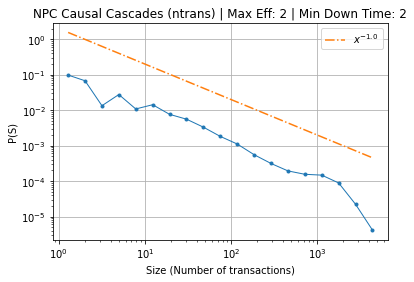

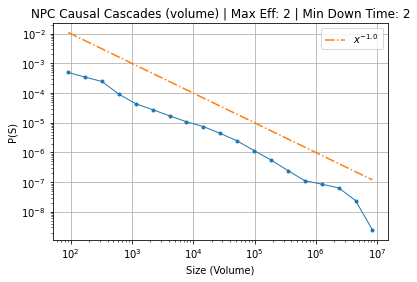

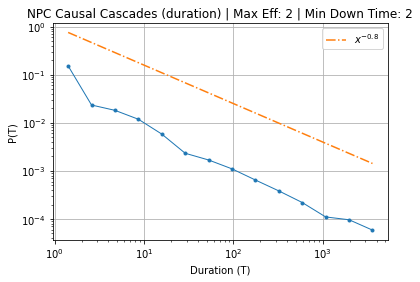

In [15]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_1000_5000_100_2_5_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

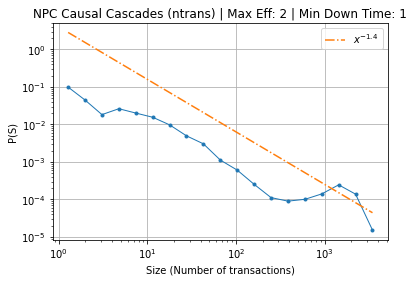

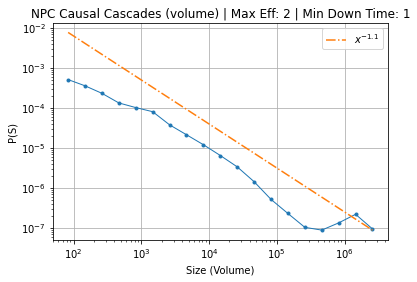

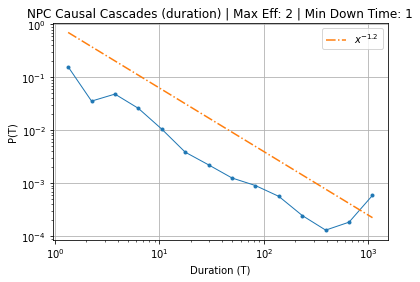

In [11]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.4)*4, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_nnpc_500_7200_100_5_10_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1), '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_500_7200_100_5_10_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2), '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_500_7200_100_5_10_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

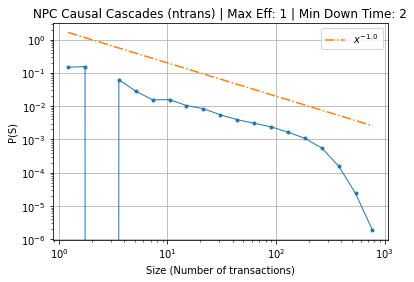

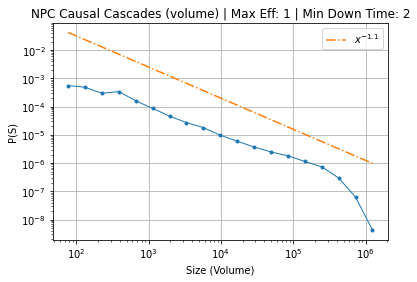

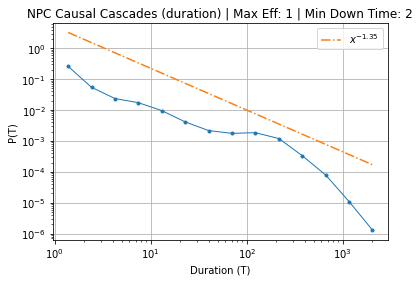

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

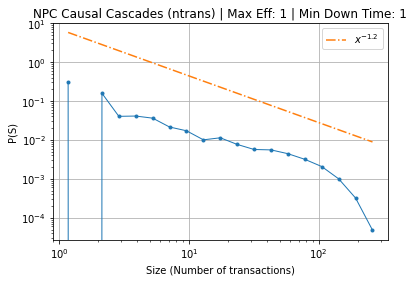

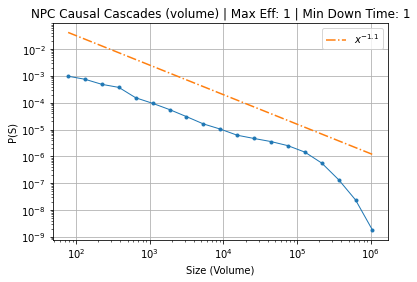

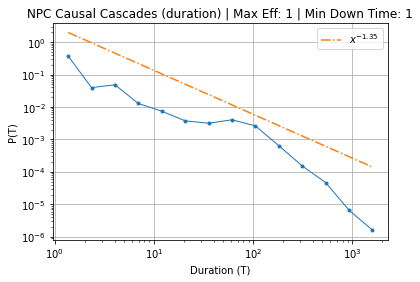

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

,Unnamed: 0,time,portfolio,stock,order
41,9,993,zjwdk,51,-2.0
69,2,993,ztnkc,15,1.0
70,4,993,ztnkc,60,-1.0
71,7,993,ztnkc,95,-1.0
262,3,993,zdmkf,98,9.0
...,...,...,...,...,...
7088500,2,8192,gnqpm,56,-25.0
7088501,3,8192,gnqpm,55,10.0
7088502,5,8192,gnqpm,79,2.0
7088503,6,8192,gnqpm,85,19.0


In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

,Unnamed: 0,time,portfolio,stock,order
2,2,993,gozxi,6,-1.0
3,6,993,gozxi,10,2.0
4,7,993,gozxi,11,1.0
5,9,993,gozxi,13,-1.0
6,10,993,gozxi,14,-2.0
...,...,...,...,...,...
1081,7,993,zwjtq,55,-2.0
1082,0,993,myduz,56,14.0
1083,1,993,myduz,55,-18.0
1084,4,993,myduz,85,38.0
